In [1]:
import pickle
import numpy as np

In [2]:
with open('train_qa.txt','rb') as train_data:
    train_data=pickle.load(train_data)

In [3]:
with open('test_qa.txt','rb') as test_data:
    test_data=pickle.load(test_data)

In [4]:
len(train_data)

10000

In [5]:
len(test_data)

1000

In [6]:
train_data[1]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 'no')

In [7]:
all_data=test_data+train_data

In [8]:
len(all_data)

11000

In [9]:
set(train_data[0][0])  #set gives al the possible words used in the sentence

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [10]:
vocabulary = set()

In [11]:
for story,question,answer in all_data:
    vocabulary=vocabulary.union(set(story))
    vocabulary=vocabulary.union(set(question))
    

In [12]:
vocabulary.add('yes')
vocabulary.add('no')  #adding our own words in the vocabulary

In [13]:
vocabulary

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [14]:
vocabulary_len=len(vocabulary)+1

In [15]:
vocabulary_len

38

In [16]:
all_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [17]:
all_story_lenghts=[len(daat[0]) for daat in all_data]

In [18]:
max_story_length=max(all_story_lenghts)

In [19]:
max_question_length = max([len(data[1]) for data in all_data])

In [20]:
max_question_length

6

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [23]:
tokenizer = Tokenizer(filters=[])


In [24]:
tokenizer.fit_on_texts(vocabulary)

In [25]:
tokenizer.word_index

{'took': 1,
 'put': 2,
 'discarded': 3,
 'travelled': 4,
 'up': 5,
 'daniel': 6,
 'football': 7,
 'left': 8,
 'grabbed': 9,
 'moved': 10,
 'down': 11,
 'john': 12,
 'bathroom': 13,
 'milk': 14,
 '?': 15,
 '.': 16,
 'back': 17,
 'hallway': 18,
 'bedroom': 19,
 'is': 20,
 'dropped': 21,
 'mary': 22,
 'journeyed': 23,
 'the': 24,
 'garden': 25,
 'went': 26,
 'no': 27,
 'office': 28,
 'in': 29,
 'got': 30,
 'apple': 31,
 'sandra': 32,
 'picked': 33,
 'yes': 34,
 'kitchen': 35,
 'there': 36,
 'to': 37}

In [26]:
train_story_text=[]
train_question_text=[]
train_answer_text=[]

In [27]:
for stroy,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answer_text.append(answer)


In [28]:
train_story_sequencs=tokenizer.texts_to_sequences(train_story_text)

In [29]:
len(train_story_sequencs)

10000

In [30]:
len(train_story_text)

10000

In [31]:
def vectoirze_story(data,word_index=tokenizer.word_index,max_story_len=max_story_length,max_question_len=max_question_length):
    X=[]#STORIES
    Q=[]#QUESTIONS
    Y=[]#ANSWERS
    
    for story,question,answer in data:
        
        
        x=[word_index[word.lower()] for word in story]
        q=[word_index[word.lower()] for word in question]
        
    
  
        y=np.zeros(len(word_index)+1)  
    
        y[word_index[answer]] = 1
    
        X.append(x)
        Q.append(q)
        Y.append(y)
    
    return(pad_sequences(X,maxlen=max_story_len),pad_sequences(Q,maxlen=max_question_len),np.array(Y))

In [32]:
inputs_train,questions_train,answers_train=vectoirze_story(train_data)

In [33]:
inputs_test,question_test,answers_test=vectoirze_story(test_data)

In [34]:
inputs_test

array([[ 0,  0,  0, ..., 24, 19, 16],
       [ 0,  0,  0, ..., 24, 25, 16],
       [ 0,  0,  0, ..., 24, 25, 16],
       ...,
       [ 0,  0,  0, ..., 24, 31, 16],
       [ 0,  0,  0, ..., 24, 25, 16],
       [ 0,  0,  0, ..., 31, 36, 16]], dtype=int32)

In [35]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
tokenizer.word_index['yes']

34

In [37]:
tokenizer.word_index['no']

27

In [38]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,
         0., 497.,   0.,   0.,   0.])

In [39]:
from tensorflow.keras.models import Sequential,Model

In [40]:
from tensorflow.keras.layers import Embedding

In [41]:
from tensorflow.keras.layers import Activation,Dense,Permute,Input,Dropout,add,dot,concatenate,LSTM

In [42]:
input_sequence = Input((max_story_length,))
question=Input((max_question_length,))

In [43]:
vocabulary_size = len(vocabulary)+1

In [44]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocabulary_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [45]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocabulary_size,output_dim=max_question_length))
input_encoder_c.add(Dropout(0.3))

In [46]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocabulary_size,output_dim=64,input_length=max_question_length))
question_encoder.add(Dropout(0.3))

In [47]:
input_encoder_m=input_encoder_m(input_sequence)
input_encoder_c=input_encoder_c(input_sequence)
question_encoder=question_encoder(question)

In [48]:
match = dot([input_encoder_m,question_encoder],axes=(2,2))
match = Activation('softmax')(match)

In [49]:
response =add([match,input_encoder_c])
response = Permute((2,1))(response)

In [50]:
answer=concatenate([response,question_encoder])

In [51]:
answer

<tf.Tensor 'concatenate/concat:0' shape=(None, 6, 220) dtype=float32>

In [52]:
answer=LSTM(32)(answer)

In [53]:
answer = Dropout(0.5)(answer)

In [54]:
answer=Dense(vocabulary_size)(answer)

In [55]:
answer = Activation('softmax')(answer)

In [56]:
model = Model([input_sequence,question],answer)

In [57]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
_______________________________________________________________________________________

In [59]:
history = model.fit([inputs_train,questions_train],answers_train,batch_size=32,epochs=20,validation_data=([inputs_test,question_test],answers_test))

Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 0.8716 - accuracy: 0.4975 - val_loss: 0.6937 - val_accuracy: 0.5010
Epoch 2/20
313/313 [==============================] - 3s 8ms/step - loss: 0.7009 - accuracy: 0.5113 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 0.6963 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5060
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 0.6948 - accuracy: 0.4992 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6955 - accuracy: 0.4959 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6945 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6938 - accuracy: 0.5031 - val_loss: 0.6954 - val_accuracy: 0.4970
Epoch

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

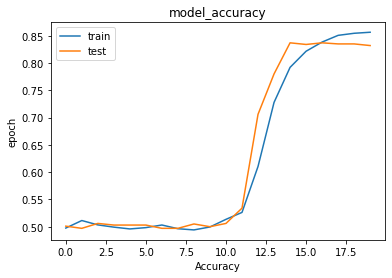

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('Accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [62]:
model.save('chatbot_10.h5')

#loading the model

In [63]:
model.load_weights('chatbot_10.h5')

In [64]:
pred_results=model.predict(([inputs_test,question_test]))

In [65]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [66]:
test_data[0][2]

'no'

In [67]:
pred_results[0]

array([6.6077450e-09, 7.1338095e-09, 7.2293362e-09, 6.6580719e-09,
       6.8290800e-09, 5.2116662e-09, 8.5666478e-09, 4.6461865e-09,
       9.1791961e-09, 7.4035422e-09, 4.5165023e-09, 8.9780610e-09,
       5.8275451e-09, 6.4197092e-09, 6.1674186e-09, 7.7624280e-09,
       6.9064829e-09, 6.3331651e-09, 4.9884061e-09, 4.7217839e-09,
       6.7698647e-09, 8.1742426e-09, 4.8659214e-09, 7.2199247e-09,
       5.3193654e-09, 6.3069105e-09, 6.4706769e-09, 9.7971088e-01,
       5.8841052e-09, 5.2476250e-09, 7.4783646e-09, 6.2133250e-09,
       8.8738190e-09, 4.6095283e-09, 2.0288952e-02, 6.7339339e-09,
       6.4400307e-09, 4.5415796e-09], dtype=float32)

In [68]:
val_max=np.argmax(pred_results[0])

In [69]:
for key,value in tokenizer.word_index.items():
    if value == val_max:
        k=key

In [70]:
k

'no'

In [71]:
pred_results[0][val_max]

0.9797109

In [72]:
vocabulary

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [73]:
my_story = 'John left the kitchen . Sandra dropped the football in the garden .'

In [74]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [75]:
my_question = 'Is the football in the garden ?'

In [76]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [77]:
my_data=[(my_story.split(),my_question.split(),'yes')]

In [78]:
my_data

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [79]:
my_story, my_question , my_answer   = vectoirze_story(my_data)

In [80]:
my_answer

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0.]])

In [81]:
pred_results=model.predict(([my_story,my_question]))

In [82]:
val_max = np.argmax(pred_results[0])

In [83]:
for key,value in tokenizer.word_index.items():
    if value == val_max:
        k=key

In [84]:
k

'yes'

In [85]:
pred_results[0][val_max]

0.94735086